In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
n = 100
M = 5
nk = 1000
u0 = 7
p = 0.1
Msig = 0.2

In [3]:
xx = np.zeros(n*M)
u = np.zeros(n*M)
dx = np.zeros(n*M)
I = []
X = []
V = []

In [4]:
for i in range(nk):
    ii = np.where(xx>0)[0]
    dx[ii] = u[ii] + 0.5
    xx[ii] = xx[ii] + dx[ii]
    u[ii] = u[ii] + 1
    
    reached_anode = np.where(xx > n)[0]
    xx[reached_anode] = 0
    u[reached_anode] = 0
    dx[reached_anode] = 0
    
    kk = np.where(u>u0)[0]
    ll = np.where(np.random.randn(len(kk))<=p)[0]
    kl = kk[ll]
    
    u[kl] = 0
    xx[kl] = xx[kl] - dx[kl]*np.random.rand()
    
    I.extend(xx[kl].tolist())
    
    m = int(np.random.randn()*Msig+M)
    
    free_slots = np.where(xx==0)[0]
    
    if len(free_slots)>=m:
        xx[free_slots[np.random.randint(len(free_slots)):np.random.randint(len(free_slots))+m]] = 1
        u[free_slots[np.random.randint(len(free_slots)):np.random.randint(len(free_slots))+m]] = 0
    else:
        xx[free_slots] = 1
        u[free_slots] = 0
        
    remaining_electrons = np.where(xx>0)[0]
    X.extend(xx[remaining_electrons].tolist())
    V.extend(u[remaining_electrons].tolist())

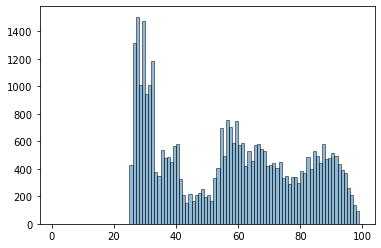

In [5]:
plt.hist(I,bins=np.arange(1,100),ec='black',alpha=0.5)
plt.show()